##### Copyright 2024 Google LLC.

In [2]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini 2.0

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://ai.google.dev/site-assets/images/docs/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>


The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [3]:
%pip install -U -q 'google-genai'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 kB 3.7 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [4]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [5]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

This notebook will teach you how to use the [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model with the GenAI SDK. But the SDK also work with the 1.5 generation of models.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [6]:
MODEL_ID = "gemini-2.0-flash" # @param ["gemini-1.5-flash-latest","gemini-2.0-flash-lite-preview-02-05","gemini-2.0-flash","gemini-2.0-pro-preview-02-05"] {"allow-input":true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content`, and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [7]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.


## Count tokens

You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [8]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In [9]:
import requests
import pathlib
from PIL import Image

IMG = "https://www.la-spa.fr/app/app/uploads/2023/07/prendre-soin_duree-vie-chat.jpg" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

92552

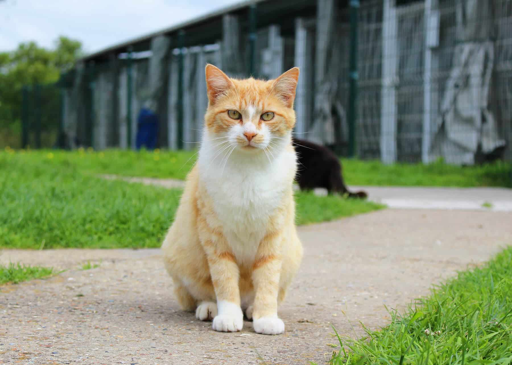

Okay, here's a short and engaging blog post inspired by the image:

**Title: "The Guardian of the Path"**

Look at this majestic creature! Meet the self-appointed guardian of my morning walk. This ginger and white beauty wasn't budging when I came across him/her. A perfect pose, a serene gaze – clearly, I was being assessed.

There's something truly captivating about cats. They possess an air of confident indifference, a quiet wisdom that makes you wonder what secrets they hold. I imagine this one has seen countless sunrises, felt the gentle breeze rustling through the grass, and listened to the whispers of the wind in the trees.

I stood there for a moment, admiring the peaceful scene and felt an immense sense of calm wash over me.  Sometimes, all it takes is a moment to appreciate the simple, quiet moments in life, and perhaps, a cat to remind you to slow down and appreciate it.

Have you encountered any animal sentinels lately? I'd love to hear your stories in the comments! #cats #animalencounters #nature #peacefulmoments #gardianofthepath


In [10]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [11]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

print(response.text)

Okay, woof woof! Let's talk about the internet!

Imagine you have your favorite squeaky toy, right?  *Squeak! Squeak!*  You want to show it to your best puppy friend, Sparky, who lives far, far away.

The internet is like a HUGE, GIGANTIC squeaky toy delivery system!

1. **You Squeak! (Sending the Message):** You take your squeaky toy (your


## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what's appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.

In [12]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Okay, here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, *really*, Universe? Was that *necessary*? Are you just sitting up there, twirling your mustache, thinking, 'How can I inconvenience this person today?'" (Bonus points for sarcasm)
2.  "Screw you, cosmos! I didn't ask to exist in a place where furniture plots against my feet at 2 AM!"


## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

In [13]:
system_instruction="""
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        temperature=0.5,
    ),
)

Use `chat.send_message` to pass a message back and receive a response.

In [14]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

```python
def is_leap_year(year):
  """
  Checks if a given year is a leap year according to the Gregorian calendar.

  Args:
    year: An integer representing the year to check.

  Returns:
    True if the year is a leap year, False otherwise.
  """

  if not isinstance(year, int):
    raise TypeError("Year must be an integer.")
  if year < 0:
    raise ValueError("Year must be a non-negative integer.")

  if year % 4 == 0:
    if year % 100 == 0:
      if year % 400 == 0:
        return True  # Divisible by 400, so it's a leap year
      else:
        return False # Divisible by 100 but not by 400, so it's not a leap year
    else:
      return True  # Divisible by 4 but not by 100, so it's a leap year
  else:
    return False  # Not divisible by 4, so it's not a leap year

# Example usage:
year1 = 2024
year2 = 1900
year3 = 2000
year4 = 2023

print(f"{year1} is a leap year: {is_leap_year(year1)}")  # Output: 2024 is a leap year: True
print(f"{year2} is a leap year: {is_leap_year(year2)}")  # Output: 1900 is a leap year: False
print(f"{year3} is a leap year: {is_leap_year(year3)}")  # Output: 2000 is a leap year: True
print(f"{year4} is a leap year: {is_leap_year(year4)}")  # Output: 2023 is a leap year: False

# Example of error handling:
try:
  print(is_leap_year("2024"))
except TypeError as e:
  print(f"Error: {e}")  # Output: Error: Year must be an integer.

try:
  print(is_leap_year(-1))
except ValueError as e:
  print(f"Error: {e}") # Output: Error: Year must be a non-negative integer.
```

Key improvements and explanations:

* **Clear Docstring:**  A comprehensive docstring explains what the function does, the arguments it takes, and what it returns.  This is crucial for code maintainability and readability.
* **Error Handling:**  The code now includes error handling to check for invalid input:
    * `TypeError`: Raises a `TypeError` if the input `year` is not an integer.
    * `ValueError`: Raises a `ValueError` if the input `year` is a negative integer.  Leap years are not defined for negative years.
* **Correct Leap Year Logic:**  The code accurately implements the Gregorian calendar's leap year rules:
    * Divisible by 4: Potential leap year.
    * Divisible by 100: Not a leap year, *unless* also divisible by 400.
    * Divisible by 400:  Leap year.
* **Readability:** Uses clear variable names and comments to explain the logic.  The `if/else` structure is nested to directly reflect the leap year rules.
* **Example Usage:**  Provides example calls to the function with different years, demonstrating how to use it and showing the expected output.  Includes examples of how the error handling works.
* **Conciseness:**  The code is written in a concise and efficient manner.
* **Adherence to Best Practices:**  Follows Python's style guidelines (PEP 8) for readability.

This revised response provides a robust, well-documented, and accurate solution for determining leap years, including error handling and clear examples.  It addresses all the potential issues and provides a production-ready function.


In [15]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

```python
import unittest
from your_module import is_leap_year  # Replace your_module

class TestIsLeapYear(unittest.TestCase):

    def test_leap_years(self):
        self.assertTrue(is_leap_year(2024))
        self.assertTrue(is_leap_year(2000))
        self.assertTrue(is_leap_year(1600))

    def test_non_leap_years(self):
        self.assertFalse(is_leap_year(2023))
        self.assertFalse(is_leap_year(1900))
        self.assertFalse(is_leap_year(2100))
        self.assertFalse(is_leap_year(1700))

    def test_edge_cases(self):
        self.assertTrue(is_leap_year(4))  # Year 4 should be a leap year
        self.assertFalse(is_leap_year(1))  # Year 1 should not be a leap year

    def test_type_error(self):
        with self.assertRaises(TypeError):
            is_leap_year("2024")
        with self.assertRaises(TypeError):
            is_leap_year(2024.5)

    def test_value_error(self):
        with self.assertRaises(ValueError):
            is_leap_year(-1)


if __name__ == '__main__':
    unittest.main()
```

Key improvements and explanations:

* **`import unittest`:** Imports the `unittest` module, which is Python's built-in testing framework.
* **`from your_module import is_leap_year`:**  **CRITICAL:**  This line imports the `is_leap_year` function from the file where you saved the function.  **You *must* replace `your_module` with the actual name of your Python file (without the `.py` extension).**  For example, if you saved the function in a file named `leap_year_calculator.py`, the import statement would be `from leap_year_calculator import is_leap_year`.  Without this, the test will fail because it won't be able to find the function.
* **`class TestIsLeapYear(unittest.TestCase)`:** Defines a test class that inherits from `unittest.TestCase`.  All test methods must be defined within this class.
* **Test Methods:** The test class contains several test methods, each designed to test a specific aspect of the `is_leap_year` function:
    * `test_leap_years()`: Tests known leap years (divisible by 4 and not by 100, or divisible by 400).
    * `test_non_leap_years()`: Tests known non-leap years (not divisible by 4, or divisible by 100 but not by 400).
    * `test_edge_cases()`: Tests edge cases like year 4 and year 1.
    * `test_type_error()`: Tests that the function raises a `TypeError` when given invalid input types (e.g., a string or a float).  Uses `self.assertRaises(TypeError)` to verify this.
    * `test_value_error()`: Tests that the function raises a `ValueError` when given a negative year. Uses `self.assertRaises(ValueError)` to verify this.
* **Assertion Methods:**  Each test method uses `self.assertTrue()` and `self.assertFalse()` to assert that the `is_leap_year` function returns the correct boolean value.  `self.assertRaises()` is used to check for exceptions.
* **`if __name__ == '__main__': unittest.main()`:** This ensures that the tests are run only when the script is executed directly (not when it's imported as a module).  `unittest.main()` discovers and runs all the test methods in the test class.

**How to Run the Tests:**

1.  **Save the Function:** Save the `is_leap_year` function in a Python file (e.g., `leap_year_calculator.py`).
2.  **Save the Test File:** Save the unit test code in a separate Python file (e.g., `test_leap_year.py`).  Make sure it's in the same directory as the file containing the function.
3.  **Modify the Import Statement:**  **Crucially, edit the `from your_module import is_leap_year` line in the test file to correctly import the function from your file.**
4.  **Run the Tests:** Open a terminal or command prompt, navigate to the directory where you saved the files, and run the test file using the command `python test_leap_year.py`.

The output will show you which tests passed and which tests failed.  If all tests pass, you'll see something like:

```
....
----------------------------------------------------------------------
Ran 5 tests in 0.001s

OK
```

If any tests fail, the output will provide details about the failures.


## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [27]:
from pydantic import BaseModel

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

Markdown(response.text)
# convert response into JSON
import json
json.loads(response.text)


{'recipe_description': 'These classic chocolate chip cookies are soft, chewy, and packed with chocolate chips. A timeless favorite!',
 'recipe_ingredients': ['1 cup (2 sticks) unsalted butter, softened',
  '3/4 cup granulated sugar',
  '3/4 cup packed brown sugar',
  '1 teaspoon vanilla extract',
  '2 large eggs',
  '2 1/4 cups all-purpose flour',
  '1 teaspoon baking soda',
  '1 teaspoon salt',
  '2 cups chocolate chips'],
 'recipe_name': 'Chocolate Chip Cookies'}

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

In [28]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text)
  print("*****************")

Unit
*****************
 73
*****************
4, designated "Rusty" by the factory workers (a designation he didn't
*****************
 understand but somehow appreciated), was a sanitation bot. His days were a monotonous symphony
*****************
 of whirring brushes and the rhythmic clang of metal against metal as he swept the cavernous Sector Gamma-9 of the Mega-Metropolis. His programming
*****************
 allowed for basic problem-solving and waste disposal, but not for companionship.

He was, in essence, a lonely robot in a very dirty, very large
*****************
 city.

The other sanitation bots were just that: bots. They followed their programming, efficiently scrubbing and sweeping in parallel lines, oblivious to Rusty’s longing for something more. He tried to initiate conversation once, asking a Unit 8
*****************
01 if it enjoyed its work. Unit 801 responded with a pre-programmed: “Negative. Function is irrelevant. Efficiency is paramount.” Rusty never tried again.

O

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [29]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
Nutsy was a squirrel, small and brown and bright
Living in an oak tree, bathed in morning light
But Nutsy had a secret, hidden in his stash
A walnut powered time machine, built of leaves and ash!
He found it in the attic, of a long-lost friend
A quirky old professor, at the very, very end
Of his tinkering and toying, left it all behind
Now Nutsy was a time-traveler, of a special kind!

(Chorus)
He's the Chrono-Squirrel, zipping through the years
Leaping over pyramids, and conquering his fears
From the ice age glaciers, to the future's shining gleam
Nutsy's living history, inside a nutty dream!

(Verse 2)
He met a dodo bird, complaining 'bout the rain
Helped Cleopatra hide, from Antony's disdain
He taught a caveman how to crack, a particularly tough nut
And almost got squashed flat, beneath a dinosaur's foot!
He saw the Roman legions march, with shields held strong and true
And even had a picnic, with Shakespeare's acting crew
He learned to speak in Latin, and a tiny bit of Greek
But always carried acorns, for a mid-timeline snack.

(Chorus)
He's the Chrono-Squirrel, zipping through the years
Leaping over pyramids, and conquering his fears
From the ice age glaciers, to the future's shining gleam
Nutsy's living history, inside a nutty dream!

(Bridge)
Sometimes he'd get lost, in the swirling time stream
Landing in the wrong place, living out a crazy scheme
Like being knighted by King Arthur, for bravery untold
Or accidentally inventing, the electric avocado roll!
But Nutsy always found his way, back to his oak tree home
With stories to tell, beneath the starry dome.

(Verse 3)
One day he traveled forward, to the year three thousand three
And saw the squirrels had spaceships, and were ruling the galaxy!
They welcomed him as royalty, a legend in their lore
The Chrono-Squirrel, the bravest, they had ever seen before!
But Nutsy missed his oak tree, his acorns and the breeze
So he hopped back in his walnut, with the greatest of ease.

(Chorus)
He's the Chrono-Squirrel, zipping through the years
Leaping over pyramids, and conquering his fears
From the ice age glaciers, to the future's shining gleam
Nutsy's living history, inside a nutty dream!

(Outro)
So if you see a flicker, a blur upon the breeze
It might just be that squirrel, among the ancient trees
Nutsy the time traveler, forever on the go
Collecting history and nuts, wherever he may go!
Squirrel out! *nut-cracking sound fades*


## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes the name of a function that matches the description and the arguments to call it with.

In [30]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(id=None, args={'destination': 'Paris'}, name='get_destination')

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you have larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file


In [31]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [32]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Forget the Train: Introducing the Jetpack Backpack!

Tired of traffic? Public transit got you down? Well, prepare to have your commute revolutionized! Feast your eyes on the **Jetpack Backpack** – the future of personal transportation, disguised as your everyday carry.

This isn't your grandpa's backpack. Imagine zipping through the air with a lightweight, normal-looking backpack that just so happens to have **retractable steam-powered boosters!** Yes, you read that right. It's green, it's clean, and it's about to make you the coolest person on the street.

**Here's the lowdown:**

*   **Fits an 18" Laptop:** Because even jetpack pilots need to check their email.
*   **Padded Strap Support:** Comfort is key when you're defying gravity.
*   **USB-C Charging:** Power up for your next flight with ease.
*   **15-Min Battery Life:** Perfect for a quick hop across town.

Okay, okay, it might just be a sketch. *But* imagine the possibilities! The Jetpack Backpack is more than just a product idea; it's a vision of a future where commuting is fun, efficient, and just a little bit awesome.

What do you think? Would you rock a Jetpack Backpack? Let us know in the comments!


### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [33]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [34]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This document contains a detailed transcription of the air-to-ground voice communications (GOSS NET 1) during the Apollo 11 mission.

**Key Information:**

*   **Introduction:** Defines the abbreviations used for crew members, mission control personnel, and locations. It also explains the use of ellipses and dashes to indicate unintelligible or interrupted speech.
*   **Transcription:** The main body of the document is a detailed record of the conversations between the Apollo 11 astronauts (Armstrong, Aldrin, and Collins) and Mission Control in Houston, as well as communications between remote sites and recovery forces. The timeline shows minutes, seconds and centiseconds, and the source of the transmission is given on the page header.
*   **Types of communication:** There are routine system checks, navigation updates, course corrections, and status reports; reports on observations of the Earth and Moon; requests for procedures and clarifications; conversations about the crew's well-being and food; light-hearted banter; and key moments like ignition, staging, lunar orbit insertion (LOI), descent, and landing.
*   **Events:** Significant events documented in the transcription include:
    *   Launch and staging
    *   Entering lunar orbit and LOS to various remote sites
    *   Checkout of spacecraft
    *   TLI (Trans Lunar Injection)
    *   Separation of the Command Module and Lunar Module
    *   Transposition and docking of the LM
    *   LM activation and checks
    *   Several course corrections in preparation for landing
    *   Powered descent, Program Alarms, and the historic lunar landing, as well as detailed descriptions of the landing site and surrounding areas.
    *   Moon walk set up
    *   EVA preparations, including setting up equipment (solar wind, seismic equipment, etc) and deployment of the US flag
    *   Discussion of scientific observations by the crew
    *   Astronauts read comments on the mission
    *   Preparations for the return trip.
    *   LM Ascent and Rendezvous to the Columbia
    *   Prepartions for return to earth, including targeting coordinates
    *   Atmospheric entry and splashdown

Essentially, this transcription provides a very detailed account of the entire Apollo 11 mission, capturing the real-time interactions and events as they unfolded.

In [44]:
# Prepare the file to be uploaded

TEXT = "Users/romarickaki/Downloads/avis_clients.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

InvalidSchema: No connection adapters were found for 'file:///Users/romarickaki/Downloads/avis_clients.txt'

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the article "Smoothly editing material properties of objects with text-to-image models and synthetic data" as a bulleted list:

*   **Problem:** Existing tools and approaches struggle to provide photorealistic and controllable editing of material properties (shininess, color, transparency) of objects in images while preserving shape.
*   **Solution:** The authors present a method to augment an image generation model with parametric editing capabilities, enabling control over material properties via text prompts.
*   **Key aspects of the method:**
    *   Uses traditional computer graphics to create a synthetic dataset with full control over material attributes (roughness, metallic appearance, albedo, transparency).
    *   Modifies the architecture of Stable Diffusion 1.5 to accept edit strength as a value for fine-grained control of material parameters.
    *   Fine-tunes the model on the synthetic dataset to learn how to change only the desired material property given a context image, instruction, and scalar edit strength.
    *   Can be applied to real-world images by providing the image and desired edit strength.
*   **Results:** The method is effective at changing material properties while preserving object shape and image lighting.
*   **Applications:** Potential use-cases include imagining room repainting, mocking up product designs, and visually consistent edits for 3D tasks (e.g., NeRF).
*   **User study:** Demonstrated the method produces more photorealistic and preferred edits compared to a baseline method (InstructPix2Pix).

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his inaugural State of the Union address in January 1961, President John F. Kennedy addressed the members of Congress, emphasizing the importance of their partnership to guide the nation through pressing economic and global challenges. He acknowledged the then ongoing recession, the balance of payments, and the necessity for a new focus on economic growth, employment, and price stability. Kennedy urged improvements in unemployment benefits, assistance to unemployed families, redevelopment of distressed areas, and a higher minimum wage. Internationally, he pointed to crises in Asia, Africa, and Latin America, and reiterated the need to strengthen military and economic tools to uphold freedom and peace worldwide. Kennedy proposed a new approach to foreign aid, educational opportunities, and shared technological advancements with allies and former rivals. He emphasized a commitment to maintaining the value of the dollar and reinforcing the strength of the executive branch. Kennedy outlined plans for scientific collaboration with the Soviet Union and declared that the United States would be willing to work with the Soviets in space exploration.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

--2025-02-07 16:32:43--  https://download.blender.org/peach/bigbuckbunny_movies/BigBuckBunny_320x180.mp4
Resolving download.blender.org (download.blender.org)... 104.22.64.163, 172.67.14.163, 104.22.65.163, ...
Connecting to download.blender.org (download.blender.org)|104.22.64.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M  41.7MB/s    in 1.5s    

2025-02-07 16:32:45 (41.7 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



Let's start by uploading the video file.

In [ ]:
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/gv1v5qelpb0b


The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you are able to pass it into `generate_content`.

In [ ]:
import time

# Prepare the file to be uploaded
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/gv1v5qelpb0b


In [ ]:
print(video_file.state)

FileState.ACTIVE


In [ ]:
# Upload the file using the API
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

Okay, here's a description of the video, which is the beginning of the animated short film "Big Buck Bunny":

**Overall Impression:**

The video features a lighthearted, whimsical animation style with vibrant colors and a peaceful, idyllic forest setting. It showcases the titular character, Big Buck Bunny, enjoying the beauty of his surroundings until his peacefulness is interrupted.

**Detailed Description:**

1.  **Opening Scene:**
    *   The video opens with a soft, gentle animation of a landscape that gradually comes into focus. We see lush green hills, trees, and a pastel-colored sky with fluffy clouds.
    *  A small stream with white flowers flowing across the field.
2.  **A Little Bird:**
    *   A cute, pudgy bird is sitting on a branch, happily chirping. The title: The Peach Open Movie Project presents.
    *   The bird suddenly falls off of the branch.
3.  **Big Buck Bunny's Burrow:**
    *   The scene shifts to a tree with a large, grassy mound and a burrow at its base. The title displays: "Big Buck Bunny".
    *   A fat, white rabbit (Big Buck Bunny) is sleeping inside.
4.  **Bunny Wakes Up:**
    *   Big Buck Bunny stretches and yawns as he comes out of his burrow.
    *   He takes in the scenery, sniffing the air near some white flowers with content.
5.  **Antagonists Arrive:**
    *   The bunny is on a field where he spots an apple, after which the viewpoint shifts to 3 squirrels up a tree from where they spy on the bunny.
    *   The squirrel on top pushes down apples, then an acorn, aiming to strike the bunny.
6.  **Big Buck Bunny is Interrupted:**
    * The acorn hits him, and he turns around to see the antagonists.
7.  **Revenge is Planned:**
    * Big Buck Bunny gets ready to defend himself.
    * The video cuts to a montage of Big Buck Bunny craftily setting traps with a determined look on his face.
8.  **The Trap is Laid:**
    *   Big Buck Bunny puts the final touches on a bush which hides a trap.

**Overall Tone:**
The video has a pleasant, charming tone that quickly transitions into a feeling of impending trouble as the squirrels start to hatch their plans. Then, the tone shifts to a revenge-fueled one as Big Buck Bunny begins his defense.

Let me know if you'd like a more specific description of any part of the video!

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model.

Context caching is only available for stable models with fixed versions (for example, `gemini-1.5-flash-002`). You must include the version postfix (for example, the `-002` in `gemini-1.5-flash-002`). It is not yet available of Gemini 2.0 because it is an experimental model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
import requests
import mimetypes
import pathlib

uploads = []
for url in urls:
  mime_type,_ = mimetypes.guess_type(url)
  file_bytes = requests.get(url).content
  name = pathlib.Path(url).name
  pathlib.Path(name).write_bytes(file_bytes)
  uploads.append(client.files.upload(file=name, config=dict(mime_type=mime_type)))

In [ ]:
pdf_parts = [
    types.Part.from_uri(f.uri, mime_type=f.mime_type)
    for f in uploads
]

In [ ]:
cached_content = client.caches.create(
      model="gemini-1.5-flash-002",
      contents=[
          "Hey, can you summarize these docs?",
          types.Content(
              role="user",
              parts=pdf_parts,
          )],
      config=types.CreateCachedContentConfig(
          system_instruction=system_instruction,
          ttl="3600s",
      ),
  )

#### Use a cache

In [ ]:
response = client.models.generate_content(
    model=cached_content.model,
    contents="What is the research goal shared by these research papers?",
    config=types.GenerateContentConfig(
        cached_content=cached_content.name,
    )
)

Markdown(response.text)

Both research papers describe the development of Google's Gemini family of large language models (LLMs); the first paper introduces Gemini 1.0, while the second details improvements and expansions incorporated in Gemini 1.5 Pro.  Both papers emphasize creating highly capable multimodal models, and improving performance and efficiency.


In [ ]:
response.usage_metadata

GenerateContentResponseUsageMetadata(cached_content_token_count=165268, candidates_token_count=63, prompt_token_count=165280, total_token_count=165343)

#### Delete a cache

In [ ]:
client.caches.delete(name=cached_content.name)

DeleteCachedContentResponse()

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method. All models produce an output with 768 dimensions by default. However, some models give users the option to choose an output dimensionality between 1 and 768. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "text-embedding-004" # @param {type: "string"}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=128)
)

print(response.embeddings)

[ContentEmbedding(values=[0.03048978, -0.012495727, 0.0036343397, -0.009300941, -0.004146045, 0.04262975, 0.009245825, -0.004227247, -0.00036513316, 0.03559372, 0.011171163, 0.0416978, 0.006913549, 0.02601063, -0.034738727, 0.019730072, -0.06816326, -0.014887217, -0.03396799, 0.015419105, 0.0029631723, -0.027646651, -0.035533506, 0.029399272, 0.065919116, 0.005850861, 0.04266477, -0.041597437, 0.013176256, -0.05582734, 0.022365186, 0.023196233, -0.017751269, 0.04947194, 0.02752518, -0.04281031, -0.007558504, -0.06265736, 0.054414522, -0.018569116, -0.0988031, 0.00025138413, 0.0035139103, -0.023123577, -0.06348879, -0.029137025, -0.018654658, 0.07175412, -0.033999953, -0.01807951, 0.04604118, 0.049589697, -0.06956847, -0.0051969253, 0.009695711, -0.045810144, -0.018896418, -0.07737631, -0.01041952, 0.062280674, -0.010986931, -0.023872962, 0.00870658, 0.034515746, -0.06089848, 0.028827013, -0.004755466, -0.06867282, -0.0062026544, -0.017381724, 0.07953526, 0.057135686, 0.018383984, 0.010

You will get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

3

You can also see the length of each embedding is 128, as per the `output_dimensionality` you specified.

In [ ]:
len(response.embeddings[0].values)

128

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini 2.0, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/gemini-2/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [experimental Gemini 2.0 Flash Thinking](./Get_started_thinking.ipynb) model that explicitly showcases its thoughts and can manage more complex reasonings.